## Load MODIS file(s)

In [5]:
import tifffile as tiff
import numpy as np
from PIL import Image
Image.MAX_IMAGE_PIXELS = 1000000000   
import matplotlib.pyplot as plt

In [6]:
from osgeo import gdal
import numpy as np

In [14]:
modis_tower_path="/media/mxh/Volume/SAT-DATA/MODIS_MOD09GA_GERITAFRA_31day_DEC2023/"
modis_win_path = "F:\\Bachelorarbeit\\sat-data\\modis\\MODIS_MOD09GA_GERITAFRA_31day_DEC2023\\"
modis_x_path = "/mnt/f/Bachelorarbeit/SAT-DATA/MODIS_MOD09GA_GERITAFRA_31day_DEC2023/"
modis_path = modis_win_path
day1 = "MOD09GA.A2023335.h18v04.061.2023340033530"

In [17]:
day1_hdf = gdal.Open(modis_path + day1 + '.hdf')
day1_subsets = day1_hdf.GetSubDatasets()

In [18]:
day1_subsets

[('HDF4_EOS:EOS_GRID:"F:\\Bachelorarbeit\\sat-data\\modis\\MODIS_MOD09GA_GERITAFRA_31day_DEC2023\\MOD09GA.A2023335.h18v04.061.2023340033530.hdf":MODIS_Grid_1km_2D:num_observations_1km',
  '[1200x1200] num_observations_1km MODIS_Grid_1km_2D (8-bit integer)'),
 ('HDF4_EOS:EOS_GRID:"F:\\Bachelorarbeit\\sat-data\\modis\\MODIS_MOD09GA_GERITAFRA_31day_DEC2023\\MOD09GA.A2023335.h18v04.061.2023340033530.hdf":MODIS_Grid_1km_2D:state_1km_1',
  '[1200x1200] state_1km_1 MODIS_Grid_1km_2D (16-bit unsigned integer)'),
 ('HDF4_EOS:EOS_GRID:"F:\\Bachelorarbeit\\sat-data\\modis\\MODIS_MOD09GA_GERITAFRA_31day_DEC2023\\MOD09GA.A2023335.h18v04.061.2023340033530.hdf":MODIS_Grid_1km_2D:SensorZenith_1',
  '[1200x1200] SensorZenith_1 MODIS_Grid_1km_2D (16-bit integer)'),
 ('HDF4_EOS:EOS_GRID:"F:\\Bachelorarbeit\\sat-data\\modis\\MODIS_MOD09GA_GERITAFRA_31day_DEC2023\\MOD09GA.A2023335.h18v04.061.2023340033530.hdf":MODIS_Grid_1km_2D:SensorAzimuth_1',
  '[1200x1200] SensorAzimuth_1 MODIS_Grid_1km_2D (16-bit inte

In [62]:
day1_state_1km = gdal.Open(f'HDF4_EOS:EOS_GRID:"{modis_path}MOD09GA.A2023335.h18v04.061.2023340033530.hdf":MODIS_Grid_1km_2D:state_1km_1')
day1_sur_refl_b04 = gdal.Open(f'HDF4_EOS:EOS_GRID:"{modis_path}MOD09GA.A2023335.h18v04.061.2023340033530.hdf":MODIS_Grid_500m_2D:sur_refl_b04_1')
day1_sur_refl_b05 = gdal.Open(f'HDF4_EOS:EOS_GRID:"{modis_path}MOD09GA.A2023335.h18v04.061.2023340033530.hdf":MODIS_Grid_500m_2D:sur_refl_b05_1')

### plot for vis

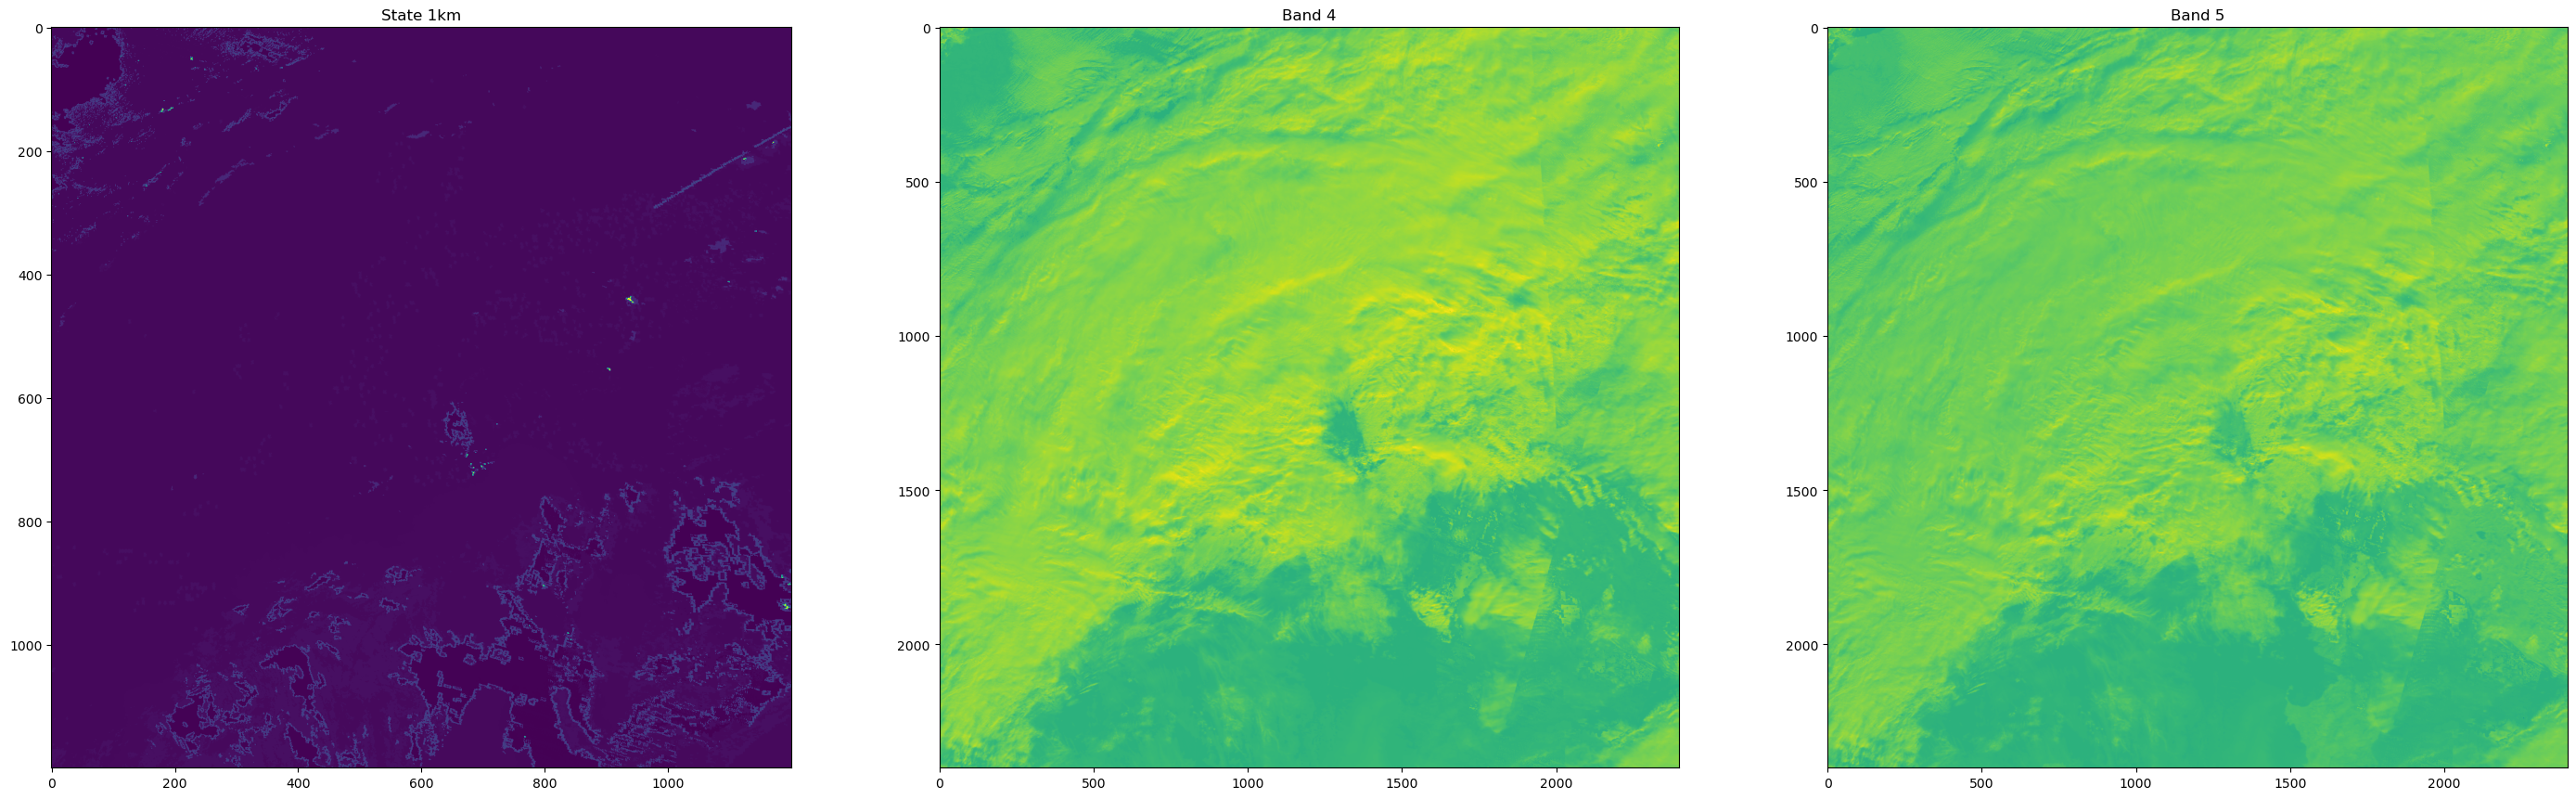

In [63]:
plt.figure(figsize=(35, 35))

plt.subplot(1, 3, 1)
plt.title('State 1km' )
plt.imshow(day1_state_1km.ReadAsArray())

plt.subplot(1, 3, 2)
plt.title('Band 4')
plt.imshow(day1_sur_refl_b04.ReadAsArray())

plt.subplot(1, 3, 3)
plt.title('Band 5' )
plt.imshow(day1_sur_refl_b05.ReadAsArray())

plt.show()

In [10]:
# convert to TIFF for Unet input?


# copy toa func from sis_GenerateBiome_TOA notebook
def _create_toa_file_MODIS(data_path, toa_path):
    print('Processing product: ' + data_path +' into ' + toa_path)
    !{gdal_path}gdal_merge.py -separate -of HFA -co COMPRESSED=YES -o {data_path}ref.img {data_path}LC8*_B[1-7,9].TIF
    !{gdal_path}gdal_merge.py -separate -of HFA -co COMPRESSED=YES -o {data_path}thermal.img {data_path}LC8*_B1[0,1].TIF
    
    !{fmask_path}fmask_usgsLandsatMakeAnglesImage.py -m {data_path}*_MTL.txt -t {data_path}ref.img -o {data_path}angles.img                
    !{fmask_path}fmask_usgsLandsatSaturationMask.py -i {data_path}ref.img -m {data_path}*_MTL.txt -o {data_path}saturationmask.img
    !mkdir -p {toa_path}
    !{fmask_path}fmask_usgsLandsatTOA.py -i {data_path}ref.img -m {data_path}*_MTL.txt -z {data_path}angles.img -o {data_path}toa.img        

    # Translate to .tif file
    !{gdal_path}gdal_translate -of Gtiff {data_path}toa.img {toa_path + data_path[-22:-1]}_toa.TIF

    # Delete all intermediate files
    !rm {data_path}*.img {data_path}*.xml

# plan is to create TOA file for MODIS file, as this will be needed for Unet prediction
# https://semiautomaticclassificationmanual.readthedocs.io/en/latest/tutorial_1.html
    # https://modis.gsfc.nasa.gov/data/atbd/atbd_mod11.pdf

In [25]:
# create TOA with GDAL, save to TIFF

# get raster band(s)
band_number = 1
#band1 = gdal.Open(f'HDF4_EOS:EOS_GRID:"/media/mxh/Volume/SAT-DATA/MODIS_MOD09GA_GERITAFRA_31day_DEC2023/MOD09GA.A2023335.h18v04.061.2023340033530.hdf":MODIS_Grid_500m_2D:sur_refl_b0{band_number}_1')
#band1_surface_refl = band1.ReadAsArray()

# retrieve solar zenith angle 
solar_zenith_angle = gdal.Open(f'HDF4_EOS:EOS_GRID:"{modis_path}MOD09GA.A2023335.h18v04.061.2023340033530.hdf":MODIS_Grid_1km_2D:SensorZenith_1')
solar_zenith_angle = solar_zenith_angle.ReadAsArray()

solar_zenith_angle_2 = gdal.Open(f'HDF4_EOS:EOS_GRID:"{modis_path}MOD09GA.A2023335.h18v04.061.2023340033530.hdf":MODIS_Grid_1km_2D:SolarZenith_1')
solar_zenith_angle_2 =solar_zenith_angle_2.ReadAsArray()

## GDAL Merging / Translating
1. Translate all individual bands (1-7) 

### Merge Bands

In [26]:
from osgeo_utils import gdal_merge

In [48]:
def prepare_modis_modGA09_file(path, filename):
    """
    filename without .hdf file extension!
    """
    f= gdal.Open(path+filename+'.hdf')
    subsets = f.GetSubDatasets()
    driver = subsets[11][0][:-3] # get common driver command
    for i in range(1,7+1):  # translate bands 1-7 to geotiff
        driveri = driver + str(i) +'_1'
        band = gdal.Open(driveri)
        gdal.Translate(destName=f'{modis_path+filename}_b{i}.tif', srcDS=band, format="GTiff")
    
    #gdal.Warp(destNameOrDestDS=path+filename+'_warped.tif', srcDSOrSrcDSTab=[f'{path+filename}_b{i}.tif' for i in range(1,7+1)])
    
    # merge_params = ['', '-separate']+[f'{path+filename}_b{i}.tif' for i in range(1,7+1)]+['-o', path+filename+'_merged.tif']
    merge_params = ['', '-separate']+[f'{path+filename}_b{i}.tif' for i in range(1,7+1)]+['-o', path+filename+'_merged.tif'] # into one layer
    gdal_merge.main(merge_params)
    #!{gdal_path}gdal_merge.py -separate {modis_path+day1}_b[1-7].tif -o {modis_path+day1}_merged.tif

In [49]:
prepare_modis_modGA09_file(modis_path, day1)

In [50]:
solar_zenith_angle

array([[ 909,  900,  891, ..., 5166, 5166, 5166],
       [ 909,  900,  891, ..., 5166, 5166, 5166],
       [ 908,  899,  890, ..., 5166, 5166, 5166],
       ...,
       [1560, 1569, 1569, ..., 5403, 5393, 5392],
       [1559, 1569, 1578, ..., 5403, 5393, 5393],
       [1559, 1569, 1578, ..., 5403, 5393, 5392]], dtype=int16)

In [51]:
solar_zenith_angle_2

array([[7384, 7383, 7383, ..., 7611, 7611, 7611],
       [7383, 7383, 7382, ..., 7610, 7611, 7611],
       [7382, 7382, 7381, ..., 7610, 7610, 7610],
       ...,
       [6426, 6425, 6425, ..., 6799, 6798, 6798],
       [6425, 6425, 6424, ..., 6798, 6796, 6796],
       [6424, 6424, 6423, ..., 6798, 6796, 6796]], dtype=int16)

In [52]:
combined = np.append(solar_zenith_angle, solar_zenith_angle_2, axis=0)
combined.shape


(2400, 1200)

In [53]:
from scipy.interpolate import RegularGridInterpolator, NearestNDInterpolator

In [54]:
solar_zenith_angle.shape

(1200, 1200)

### Upscale Solar Zenith Angle SZA

In [55]:
def upscale_nn(original_array_copy, scale_factor=2):
    upscaled_array = np.repeat(np.repeat(original_array_copy, scale_factor, axis=0), scale_factor, axis=1)
    # Create an index grid for the upscaled array
    x, y = np.meshgrid(np.arange(upscaled_array.shape[1]), np.arange(upscaled_array.shape[0]))

    # Find non-missing values (assuming missing values are NaN)
    valid_indices = ~np.isnan(upscaled_array)

    # Create an interpolator
    interp = NearestNDInterpolator((x[valid_indices], y[valid_indices]), upscaled_array[valid_indices])

    # Evaluate the interpolator at all points
    interpolated_values = interp(x, y)

    # Replace missing values with interpolated values
    upscaled_array[np.isnan(upscaled_array)] = interpolated_values[np.isnan(upscaled_array)]

    return upscaled_array

In [56]:
upscaled_sza = upscale_nn(solar_zenith_angle)
upscaled_sza2 = upscale_nn(solar_zenith_angle_2)

In [57]:
# band1_surface_refl

In [58]:
# convert degree to radians for zenith(s)
solar_zenith_angle_2_rad = np.deg2rad(upscaled_sza2)
solar_zenith_angle_rad = np.deg2rad(upscaled_sza)

In [25]:
# calc TOA reflectance:
toa_refl_band1 = band1_surface_refl / np.cos(solar_zenith_angle_rad)

In [59]:
toa_refl_band1

NameError: name 'toa_refl_band1' is not defined

In [60]:
# toa calc for every band
merged_day1 = gdal.Open(modis_path + day1 + '_merged.tif').ReadAsArray()
merged_day1

array([[[5125, 6402, 6490, ..., 5554, 5554, 5441],
        [5264, 5825, 5176, ..., 5629, 5629, 5309],
        [5454, 4736, 4736, ..., 5629, 5629, 5309],
        ...,
        [6910, 7046, 6917, ..., 7230, 7230, 7243],
        [7104, 7104, 6472, ..., 7130, 7130, 7095],
        [7256, 6614, 5673, ..., 7408, 7130, 7133]],

       [[4800, 6218, 6433, ..., 5494, 5494, 5352],
        [4974, 5651, 5067, ..., 5536, 5536, 5237],
        [5308, 4590, 4590, ..., 5536, 5536, 5237],
        ...,
        [7256, 7396, 7297, ..., 7080, 7080, 7106],
        [7442, 7442, 6839, ..., 7024, 7024, 6922],
        [7652, 7000, 6062, ..., 7234, 7024, 6976]],

       [[5895, 6776, 6620, ..., 5377, 5377, 5247],
        [5879, 6220, 5476, ..., 5556, 5556, 5126],
        [5856, 5189, 5189, ..., 5556, 5556, 5126],
        ...,
        [6902, 6910, 6842, ..., 6918, 6918, 6916],
        [6939, 6939, 6384, ..., 6810, 6810, 6766],
        [7119, 6513, 5673, ..., 7083, 6810, 6759]],

       ...,

       [[4146, 5408, 585

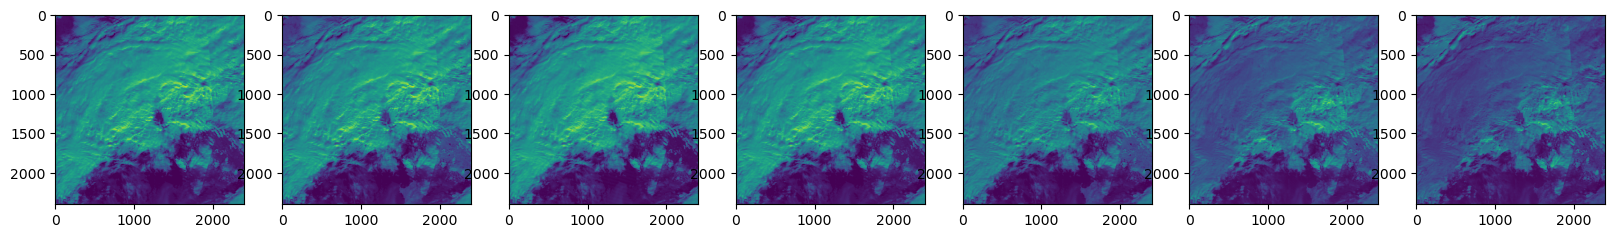

In [61]:
fig, axes = plt.subplots(1,7, figsize=(20,20))
for i, ax in enumerate(axes.flat):
    #ax.imshow(merged_day1)
    ax.imshow(merged_day1[i])

In [62]:
toa_bands = np.empty((7,2400,2400))
for i, b in enumerate(merged_day1):
    toa_bands[i] = (b * np.cos(solar_zenith_angle_rad))

In [63]:
toa_bands

array([[[-5061.90283203, -6323.18066406, -6490.        , ...,
         -3264.57006836, -3264.57006836, -3198.15014648],
        [-5199.19140625, -5753.28466797, -5176.        , ...,
         -3308.65429688, -3308.65429688, -3120.56225586],
        [-5386.85253906, -4677.69189453, -4736.        , ...,
         -3308.65429688, -3308.65429688, -3120.56225586],
        ...,
        [-3350.03100586, -3415.96484375, -4353.01074219, ...,
          7176.10498047,  7176.10498047,  7189.00830078],
        [-3444.08374023, -3444.08374023, -4072.96313477, ...,
          7076.85058594,  7060.61230469,  7025.953125  ],
        [-3517.77490234, -3206.52734375, -3570.13598633, ...,
          7352.77832031,  7060.61230469,  7063.58349609]],

       [[-4740.90429688, -6141.44628906, -6433.        , ...,
         -3229.30297852, -3229.30297852, -3145.8371582 ],
        [-4912.76171875, -5581.42675781, -5067.        , ...,
         -3253.98999023, -3253.98999023, -3078.24169922],
        [-5242.64990234, 

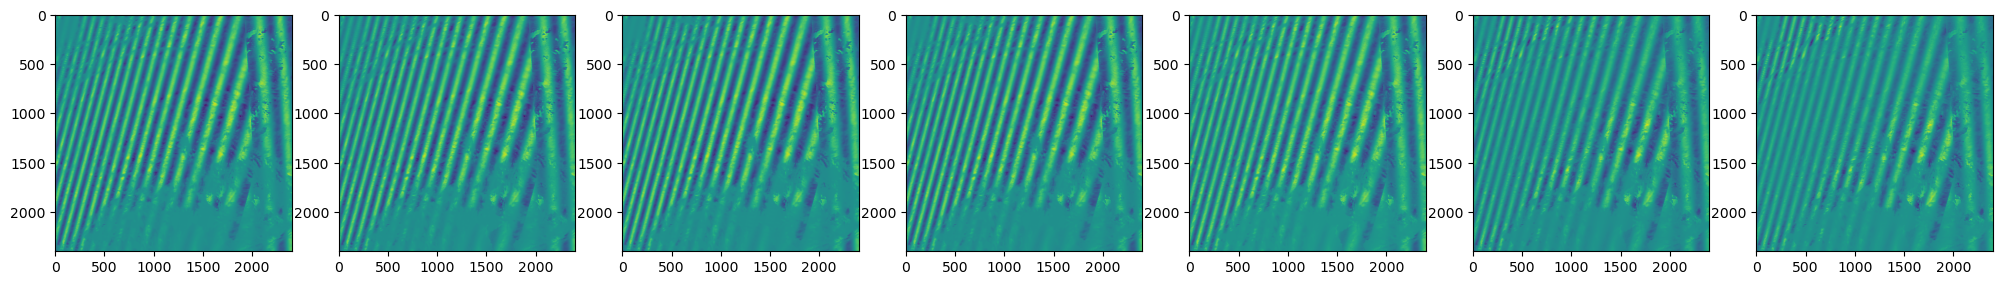

In [64]:
fig, axes = plt.subplots(1,7, figsize=(25,25))
for i, ax in enumerate(axes.flat):
    ax.imshow(toa_bands[i])

##### ---------------------> TOA calc failed

### Save and test saved image

In [32]:
# getting projection from Subdataset
projection = day1_sur_refl_b05.GetProjection()
projection

'PROJCS["unnamed",GEOGCS["Unknown datum based upon the custom spheroid",DATUM["Not specified (based on custom spheroid)",SPHEROID["Custom spheroid",6371007.181,0]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]]],PROJECTION["Sinusoidal"],PARAMETER["longitude_of_center",0],PARAMETER["false_easting",0],PARAMETER["false_northing",0],UNIT["Meter",1],AXIS["Easting",EAST],AXIS["Northing",NORTH]]'

In [33]:
# getting geotransform from subdataset
geo_t = day1_sur_refl_b05.GetGeoTransform()
geo_t

(0.0, 463.3127165279167, 0.0, 5559752.598333, 0.0, -463.31271652750013)

In [34]:
driver = gdal.GetDriverByName("GTiff")
out_raster = driver.Create("hi.tiff", 24, 24, 7, gdal.GDT_Float32)
out_raster.SetProjection(projection)
out_raster.SetGeoTransform(geo_t)
out_raster.FlushCache()
out_raster=None

In [35]:
hi = gdal.Open("hi.tiff")
hi.GetProjection()

'PROJCS["unnamed",GEOGCS["Unknown datum based upon the custom spheroid",DATUM["Not specified (based on custom spheroid)",SPHEROID["Custom spheroid",6371007.181,0]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]]],PROJECTION["Sinusoidal"],PARAMETER["longitude_of_center",0],PARAMETER["false_easting",0],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH]]'

In [57]:
def np_3D_array_to_tiff(output_path, np_array, projection, geo_transform, no_data_value=15):
    """
    Note: Filename has to end with .tiff (double f)
    """
    if output_path[-5:] != ".tiff":
        output_path += ".tiff"

    np_array[np.isnan(np_array)] = no_data_value

    driver = gdal.GetDriverByName("GTiff")
    out_raster = driver.Create(output_path, np_array.shape[2], np_array.shape[1], np_array.shape[0], gdal.GDT_Float32)
    # where np_array.shape(0) is band amount
    out_raster.SetProjection(projection)
    out_raster.SetGeoTransform(geo_t)
    
    for i, b in enumerate(np_array):  # np_array has to be sorted (bands) in ascending order
        out_band = out_raster.GetRasterBand(i+1)  # Gdal Rasters start at index 1
        out_band.WriteArray(b)
        # out_band.SetNoDataValue(no_data_value)  # safe?
        out_band.FlushCache()
        out_band = None
    out_raster.FlushCache()
    out_raster = None

In [58]:
# test np_array_to_tiff
np_3D_array_to_tiff(modis_path+day1+"_TOA_not_rly", np_array=toa_bands, projection=projection, geo_transform=geo_t)

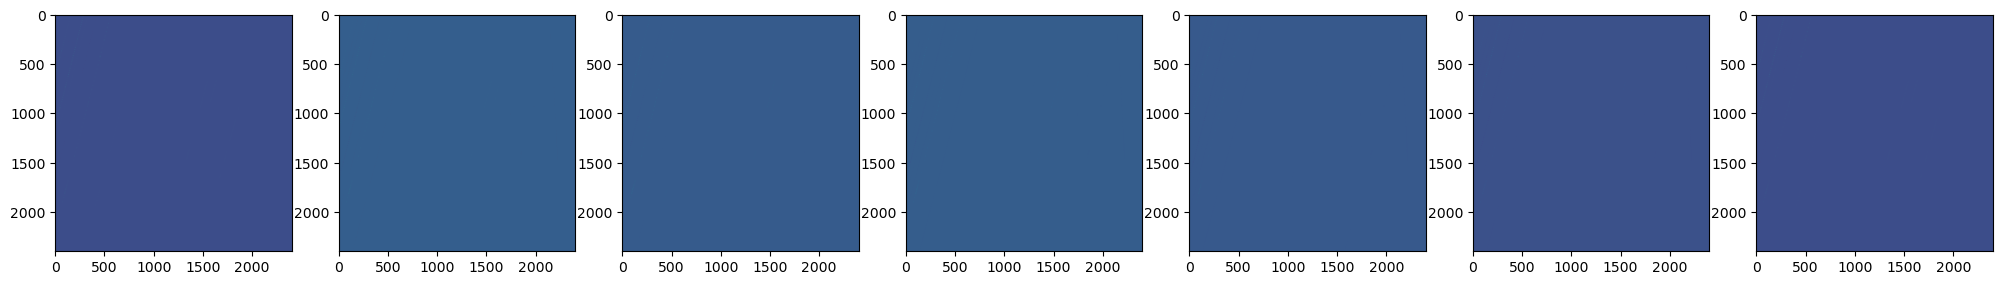

In [59]:
gtiff = gdal.Open(modis_path+day1+"_TOA_not_rly.tiff").ReadAsArray()
fig, axes = plt.subplots(1,7, figsize=(25,25))
for i, ax in enumerate(axes.flat):
    ax.imshow(gtiff[i])